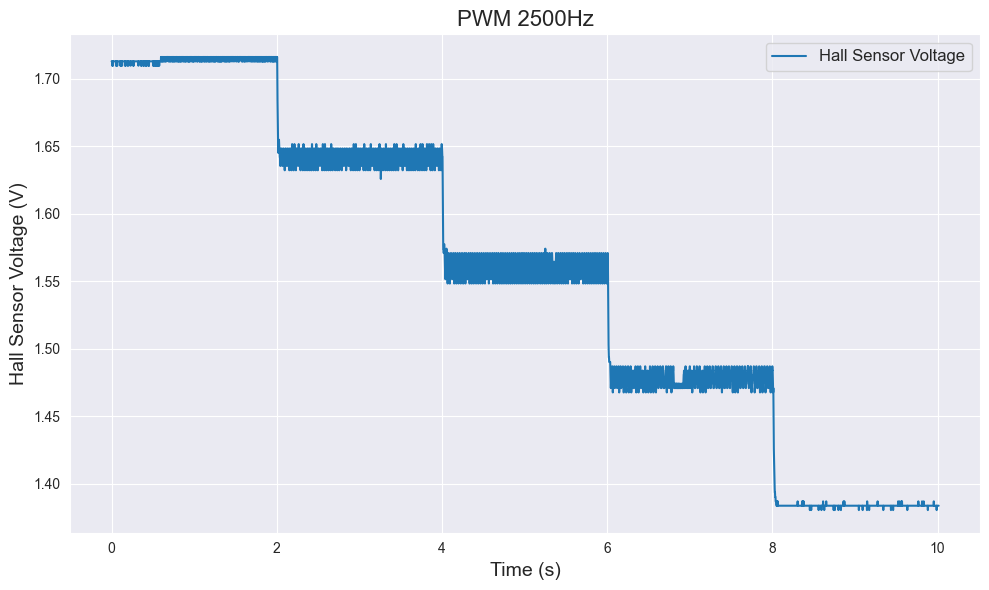

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
#file_name = "switching_speed_multithreaded.csv"
file_name = "duty_cycle_field_study.csv"
data = pd.read_csv(file_name)


# Extract time and voltage
time = data["Time (s)"]
voltage = data["Hall Sensor Voltage (V)"]

# Plot the voltage over time
plt.figure(figsize=(10, 6))
plt.plot(time, voltage, marker=None, linestyle="-", label="Hall Sensor Voltage")

# Add labels, title, and legend
plt.title("PWM 2500Hz", fontsize=16)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Hall Sensor Voltage (V)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


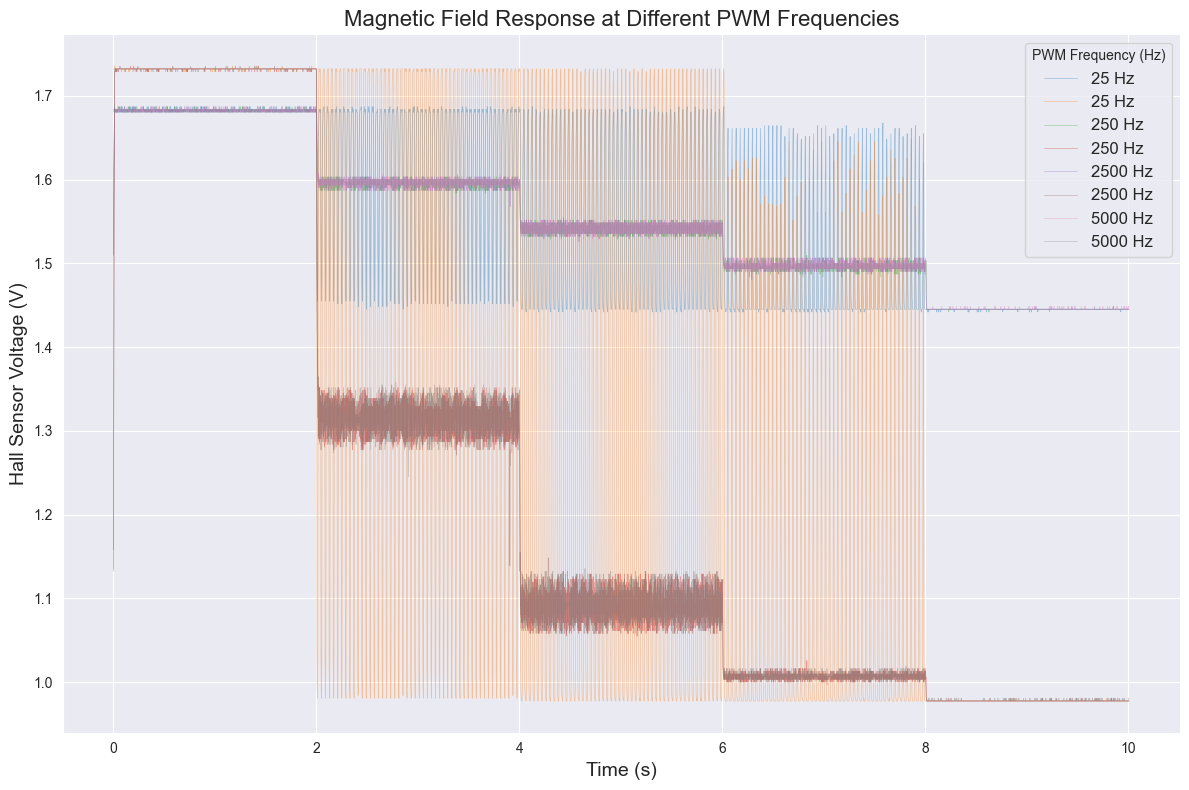

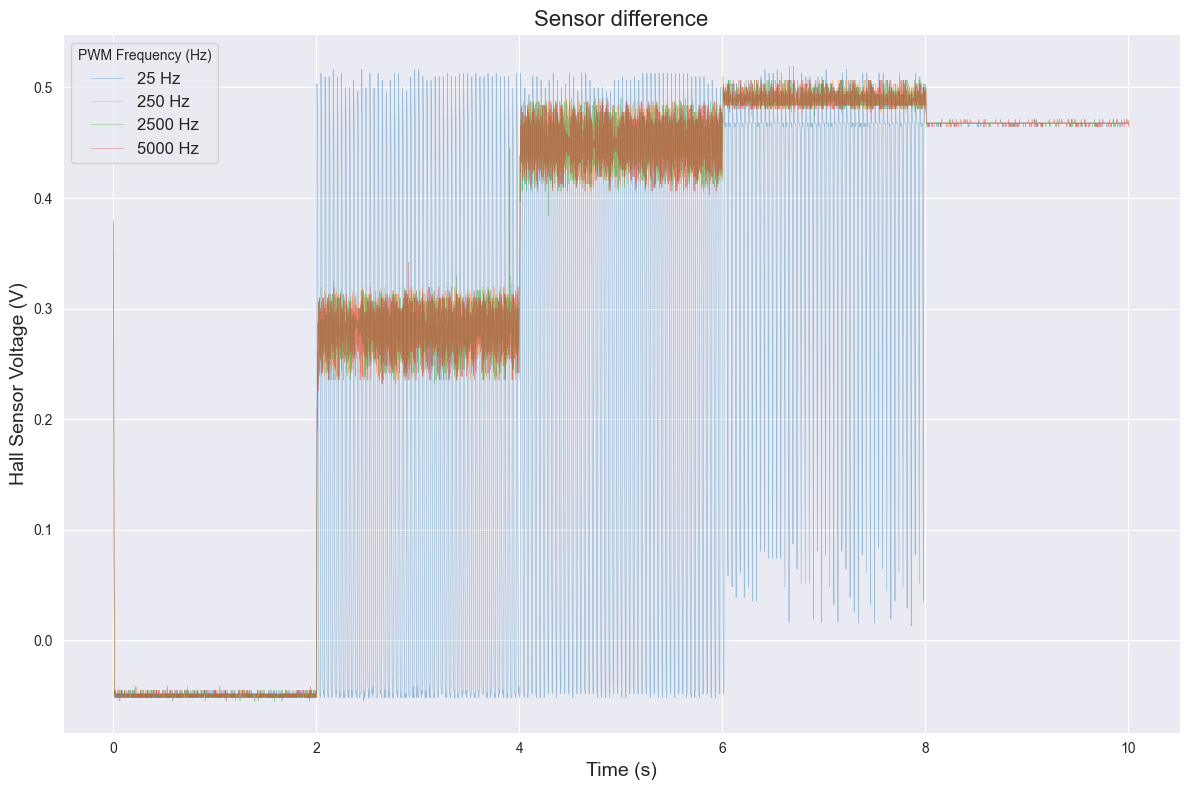

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

# Load the data from the CSV file
file_name = "pwm_frequency_duty_cycle_study.csv"
data = pd.read_csv(file_name)

# Function to plot sensor voltage at different PWM frequencies and duty cycles
def plot_pwm_response(data):
    # Ensure data is sorted by frequency, duty cycle, and time
    data = data.sort_values(by=["PWM Frequency (Hz)", "Duty Cycle (%)", "Time (s)"])

    # Unique PWM frequencies and duty cycles
    pwm_frequencies = sorted(data["PWM Frequency (Hz)"].unique())
    duty_cycles = sorted(data["Duty Cycle (%)"].unique())

    # Plot voltage over time for each frequency
    plt.figure(figsize=(12, 8))
    for freq in pwm_frequencies:
        subset = data[data["PWM Frequency (Hz)"] == freq]
        plt.plot(
            subset["Time (s)"],
            subset["Hall Sensor 0 Voltage (V)"],
            label=f"{freq} Hz",
            alpha=0.4,
            linewidth=0.5
        )
        plt.plot(
            subset["Time (s)"],
            subset["Hall Sensor 1 Voltage (V)"],
            label=f"{freq} Hz",
            alpha=0.4,
            linewidth=0.5
        )
        
    
    plt.title("Magnetic Field Response at Different PWM Frequencies", fontsize=16)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Hall Sensor Voltage (V)", fontsize=14)
    plt.legend(title="PWM Frequency (Hz)", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot voltage vs. duty cycle at each frequency
    plt.figure(figsize=(12, 8))
    for freq in pwm_frequencies:
        subset = data[data["PWM Frequency (Hz)"] == freq]
        plt.plot(
            subset["Time (s)"],
            subset["Hall Sensor 0 Voltage (V)"] - subset["Hall Sensor 1 Voltage (V)"],
            label=f"{freq} Hz",
            alpha=0.4,
            linewidth=0.5
        )
    plt.title("Sensor difference", fontsize=16)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Hall Sensor Voltage (V)", fontsize=14)
    plt.legend(title="PWM Frequency (Hz)", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_pwm_response(data)
